# What's the similarity between different philosophy schools?

There are many schools of philosophy in history. Though they must have many differences since they arise from different social background and political views, there might be some similarities between them. For example, some schools might be more subjective that care more about people's mind and thinking, while other schools may be objective that pay attention to the logic or the world around us. Also, some schools might be influenced by others.

In this project, I analyze the similarity by comparing the most frequent words, the length of sentences, the sentiment and emotions from sentences of over 50 texts spanning 13 major schools of philosophy.

The dataset could be found here:https://www.kaggle.com/kouroshalizadeh/history-of-philosophy.
The sentence is already tokenized.

In [401]:
from IPython.display import display_html
display_html("""<button onclick="$('.input, .prompt, .output_stderr, .output_error').toggle();">Toggle Code</button>""", raw=True)


Toggle Code

In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [399]:
df = pd.read_csv('./data/philosophy_data.csv')
schools = df.school.unique().tolist()

## Word frequency

From the word clouds, we can see that some words appear often in more than one schools.
Like "mind" appears often in empiricism and rationalism, which might indicate they both care about people's inner world.
"Labour" appears often in communism and capitalism, which indicates "labour" is important to both of the schools.
Similarly, nietzsche and fiminism care much about "life".

In [175]:
#stopwords
stopwords = set(STOPWORDS)
stopwords.add('will')
stopwords.add('one')
stopwords.add('may')
stopwords.add('say')
stopwords.add('said')
stopwords.add('well')
stopwords.add('don')
stopwords.add('something')
stopwords.add('even')
stopwords.add('us')
stopwords.add('let')
stopwords.add('ll')

<ipython-input-119-2f58ce115719>:10: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout(rect=[2, 2, 1, 3])


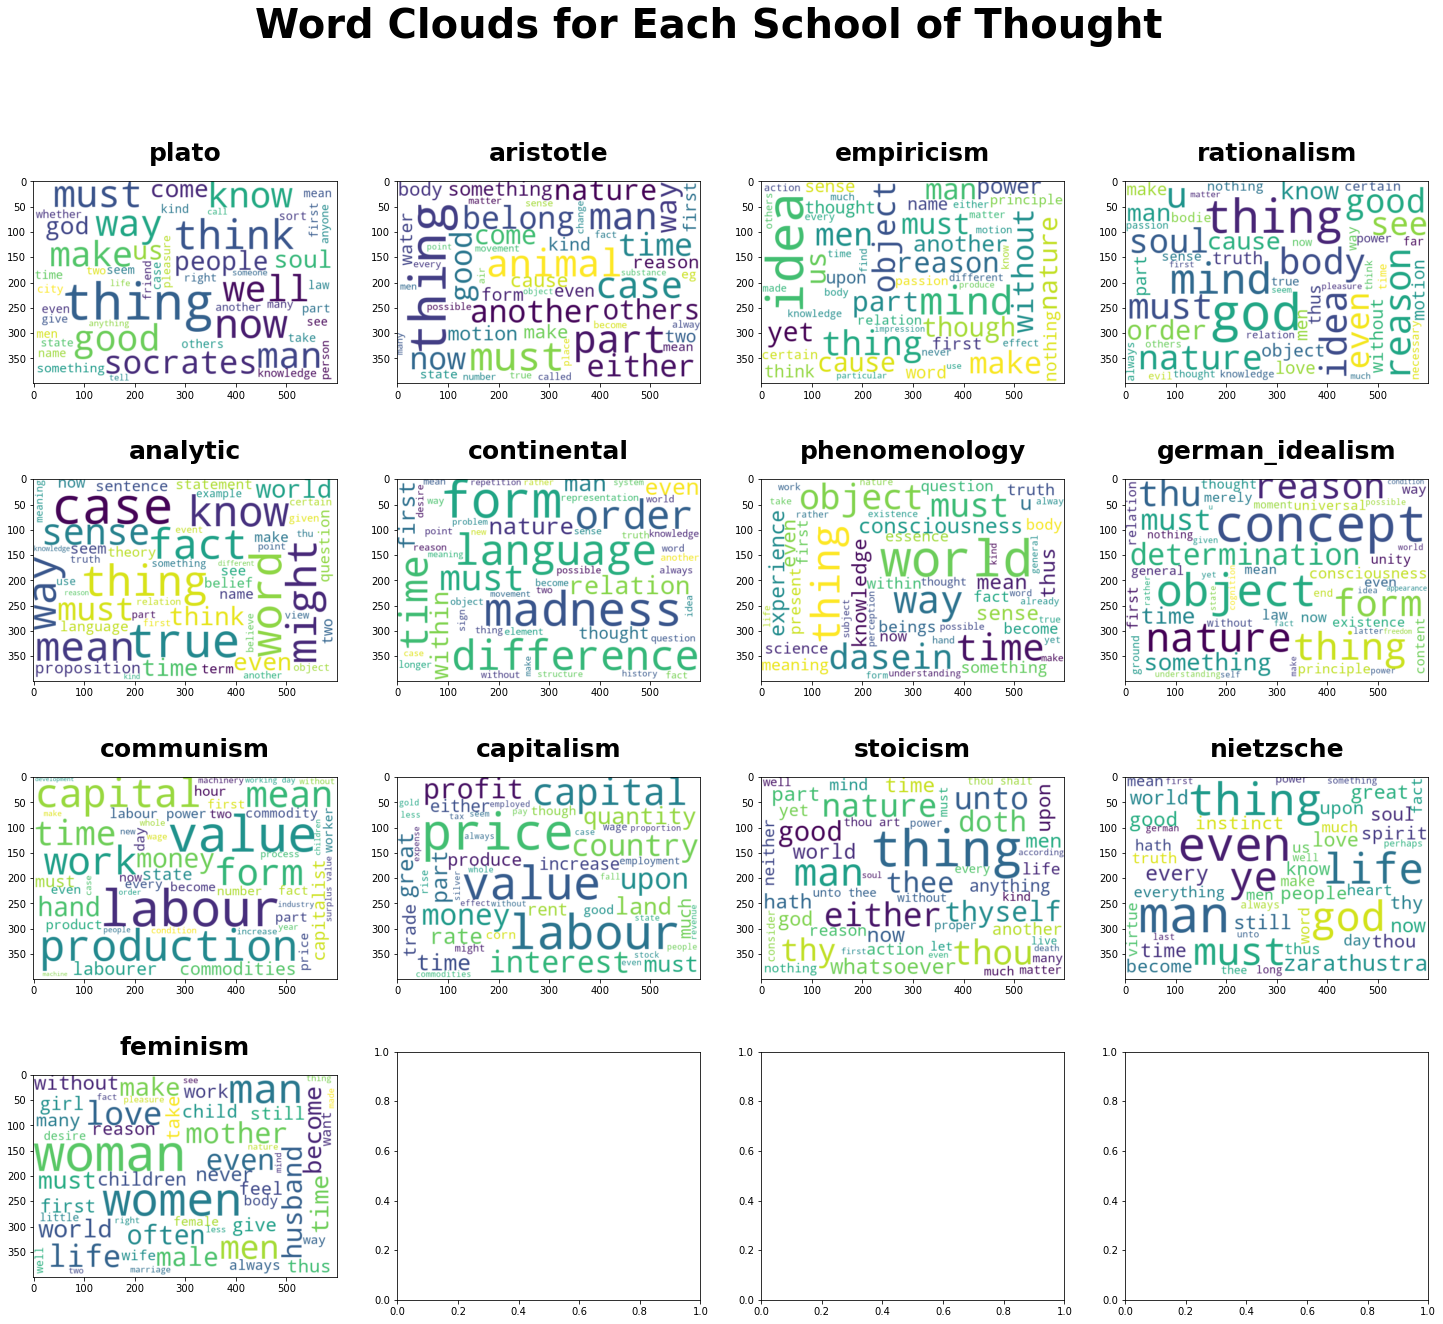

In [119]:
stopwords = set(STOPWORDS)
stopwords.add('will')
stopwords.add('one')
stopwords.add('may')
stopwords.add('say')
stopwords.add('said')
i=0
fig, ax= plt.subplots(4, 4, figsize=(25, 21))
ax=ax.ravel()
fig.tight_layout(rect=[2, 2, 1, 3])
fig.suptitle('Word Clouds for Each School of Thought', size=40, fontweight='bold')
for sc in schools:
    df_temp = df[df.school==sc]
    text = " ".join(txt for txt in df_temp.sentence_lowered)
    wordcloud = WordCloud(stopwords=stopwords, max_font_size=100, max_words=50,
                          width = 600, height = 400,
                          background_color="white").generate(text)
    ax[i].imshow(wordcloud, interpolation="bilinear")
    ax[i].set_title(str(sc), size=25, pad=20, fontweight='bold')
    i+=1

If we look at top 15 frequent words for each school, we can find that some schools have exactly same top 15 frequent words.

In [404]:
def stringtolist(s):
    s=s.replace("'","")
    s=s.replace("[","")
    s=s.replace("]","")
    s=s.replace(" ","")
    l=list(s.split(","))
    return l 
df['tokenized_txt']=df['tokenized_txt'].apply(stringtolist)



In [407]:
import nltk
from nltk.probability import FreqDist
temp=pd.DataFrame()
for school in schools:
    df_school=df[df['school']==school]
    result=[]
    for i in range(len(df_school)):
        tokenized=df['tokenized_txt'].iloc[i]
        cleaned_words=[x for x in tokenized if x not in stopwords]
        for i in range(len(cleaned_words)):
            if cleaned_words[i]=='thing':
                cleaned_words[i]='things'
            if cleaned_words[i]=='men':
                cleaned_words[i]='man'
        result+=cleaned_words

    freq_dist = FreqDist(result)
    common_words=freq_dist.most_common(15)
    l=[]
    for i in range(len(common_words)):
        l.append(common_words[i][0])

    temp[school]=l
print(temp)

       plato aristotle empiricism rationalism  analytic continental  \
0     things    things     things      things    things      things   
1        man       man        man         man       man         man   
2        now      must   socrates    socrates      must         now   
3       must       now        now       think       now       think   
4       good      good      think         now      good        good   
5      think       way       good        good       way    socrates   
6        way     think        way        know      time         way   
7   socrates      time       know         way     think        must   
8     people  socrates     people      people    people      people   
9       know    people       must        must  socrates        know   
10      make      know  knowledge   knowledge       two        make   
11      soul     every       many        many      case        soul   
12      many       two     others        make    either        time   
13    

Like plato and continental(they both talk about people and soul), empiricism and rationalism and feminism (care about mind and life), communism and capitalism (care about people, labour and knowledge).

Therefore, some schools have similar "sentence styles", that they talk about similar words very often, which means those schools care about something in common though they may stress different aspects.

In [217]:
m=pd.DataFrame(data=[[0 for i in range(13)] for j in range(13)],columns=schools,index=schools)
for i in range(0,12):
    for j in range(i+1,13):
        l1=temp.iloc[:,i]
        l2=temp.iloc[:,j]
        s1=set(l1)
        s2=set(l2)
        num=len(s1.intersection(s2))
        m[schools[i]][schools[j]]=num
print(m)

                 plato  aristotle  empiricism  rationalism  analytic  \
plato                0          0           0            0         0   
aristotle           12          0           0            0         0   
empiricism          14         12           0            0         0   
rationalism         14         12          15            0         0   
analytic            11         13          11           11         0   
continental         15         12          14           14        11   
phenomenology       14         11          14           14        10   
german_idealism     13         14          12           12        12   
communism           13         12          14           14        12   
capitalism          13         12          14           14        12   
stoicism            11         10          10           10        10   
nietzsche           12         11          12           12        11   
feminism            14         12          15           15      

## sentence length

I also want to compare the sentence length of each school to find out which schools always tirade and which school talks succintly.

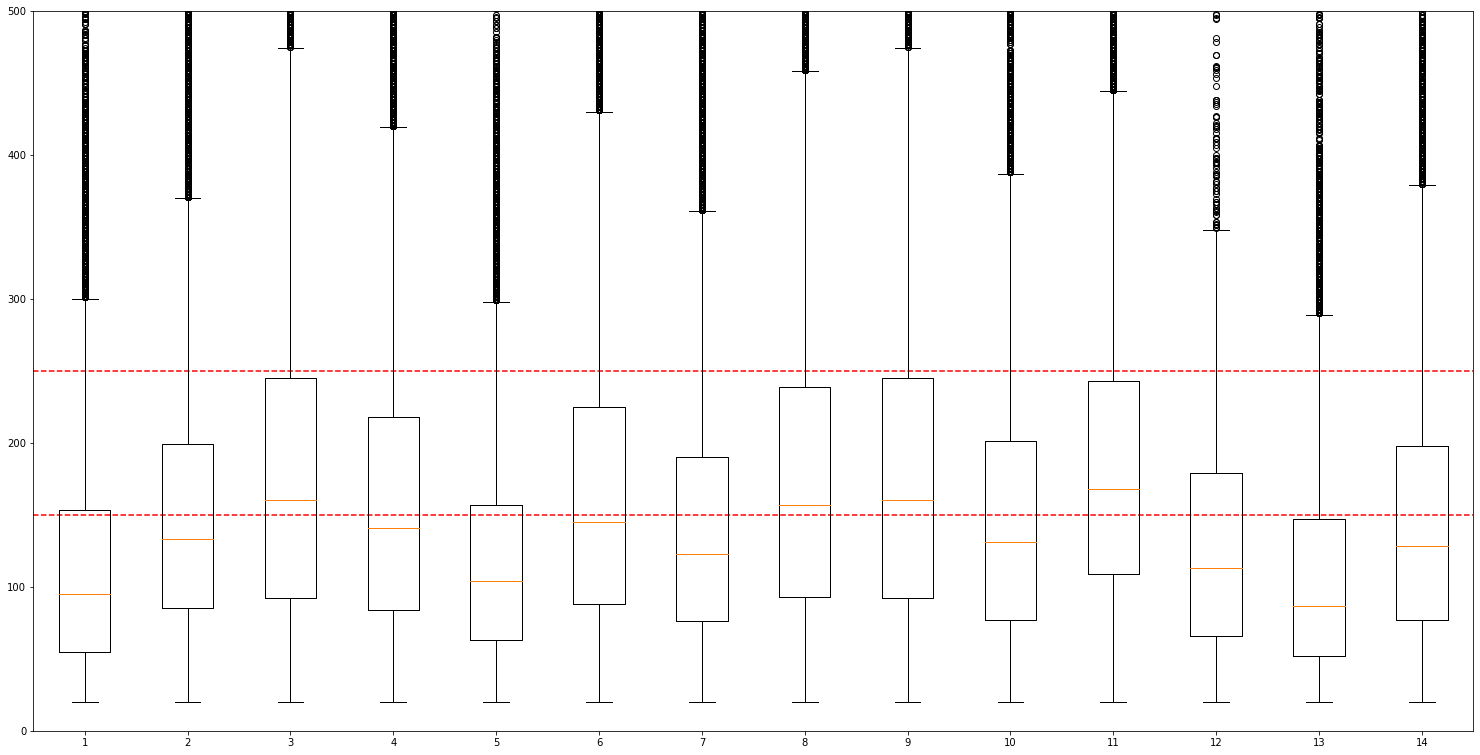

['plato',
 'aristotle',
 'empiricism',
 'rationalism',
 'analytic',
 'continental',
 'phenomenology',
 'german_idealism',
 'communism',
 'capitalism',
 'stoicism',
 'nietzsche',
 'feminism']

In [413]:
#sentence_length
df_length=df[['school','sentence_length']]
data=[df_length[df_length.school=='plato'].sentence_length,df_length[df_length.school=='aristotle'].sentence_length,df_length[df_length.school=='empiricism'].sentence_length,df_length[df_length.school=='rationalism'].sentence_length,
     df_length[df_length.school=='analytic'].sentence_length,df_length[df_length.school=='continental'].sentence_length,df_length[df_length.school=='phenomenology'].sentence_length,df_length[df_length.school=='german_idealism'].sentence_length,
     df_length[df_length.school=='empiricism'].sentence_length,df_length[df_length.school=='communism'].sentence_length,df_length[df_length.school=='capitalism'].sentence_length,df_length[df_length.school=='stoicism'].sentence_length,df_length[df_length.school=='nietzsche'].sentence_length,df_length[df_length.school=='feminism'].sentence_length]
fig = plt.figure(figsize =(20, 10))
ax = fig.add_axes([0, 0, 1,1])
ax.set_ylim(0, 500)
plt.axhline(150, color='r', linestyle='--', label='xxx')
plt.axhline(250, color='r', linestyle='--', label='xxx')
ax.boxplot(data)
plt.show()
schools

I focus on the mean, median, 25th percentile, 75th percentile of each school's sentence length, and then compute the distance between different schools.


From the heatmap, we can see that analytic, plato and nietzche often speak short sentences,
capitalism, empiricism,and german_idealism prefer very long sentence, and we should be prepared to spend more time reading their texts.
While other schools are of medium sentence length.

<AxesSubplot:xlabel='school', ylabel='school'>

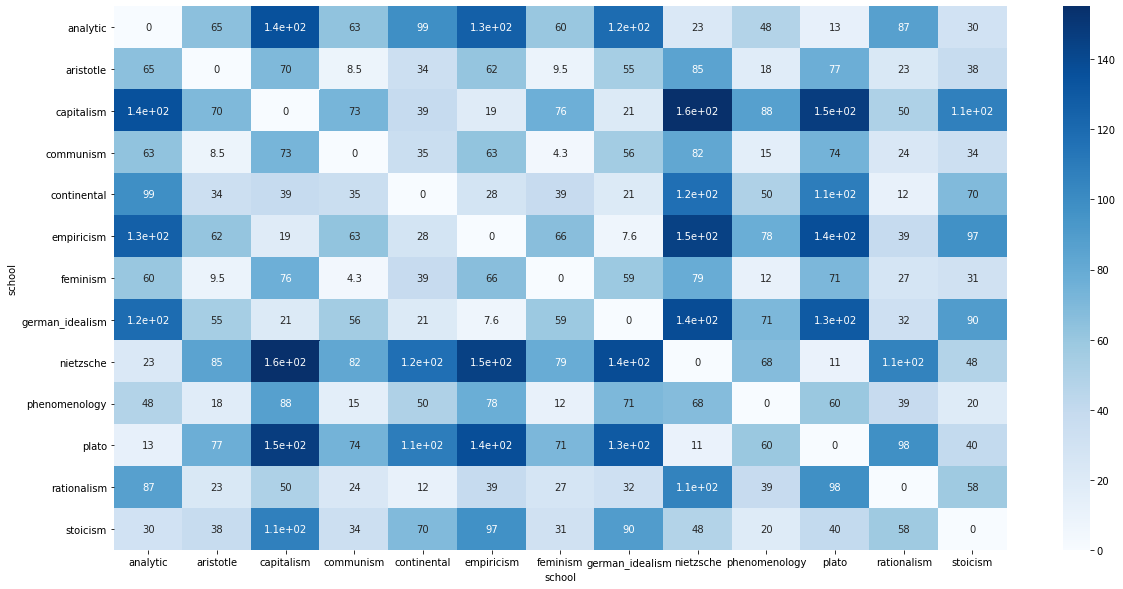

In [90]:
#compute distance
df_summary=df_length.groupby('school').agg(mean=('sentence_length','mean'),median=('sentence_length','median'))
df_summary['percentile_25']=df_length.groupby(['school'])['sentence_length'].quantile(.25)
df_summary['percentile_75']=df_length.groupby(['school'])['sentence_length'].quantile(.75)
from scipy.spatial import distance_matrix
import seaborn as sns
distance=pd.DataFrame(distance_matrix(df_summary.values, df_summary.values), index=df_summary.index, columns=df_summary.index)

#heatmap
f, ax = plt.subplots(figsize = (20, 10))
sns.heatmap(distance,ax=ax,annot=True,cmap='Blues')

## Sentiment analysis

I assume some schools have positive attitudes to the world, they think everything will be better and we should not give up. Conversly others think the world could not be worse, and people are born bad, no matter what we do, we can not change the result.

The sentiment are of three types: positive, negative and neutrals.
From my sentiment analysis, I give each sentence a sentiment label based on their sentiment scores. Then I compute the number of sentence for each three sentiment of each school. I also cluster these schools based on the sentiment.

In [3]:
#Sentiment analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer

def SentimentAnlysis(sentence):
    sentAnalyzer = SentimentIntensityAnalyzer()
    sentDict = sentAnalyzer.polarity_scores(sentence)
    if sentDict['compound'] >= 0.05:
        return "positive"
    elif sentDict['compound'] <= -0.05 :
        return "negative"
    else:
        return "neutral"

def Analyzer(dataFrame, school):
    df = dataFrame[dataFrame['school'] == school] 
        
    #making a Corpus and finding sentiments
    corpus = ''
    numPostives = 0
    numNegatives = 0
    numNeutrals = 0
    
    for mem in df['sentence_lowered']:
        corpus += mem
    
    for i in range (len(df)):
        sent = (SentimentAnlysis(df['sentence_lowered'].iloc[i]))
        if sent == "positive":
            numPostives += 1
        elif sent == "negative":
            numNegatives += 1
        else:
            numNeutrals += 1
    
    type_list={numPostives:'positive',numNegatives:'negative',numNeutrals:'neutrals'}
    max_type=type_list.get(max(type_list))
    print(school,':',max_type)
    return numPostives,numNegatives,numNeutrals
    #plt.figure(figsize = (7, 7))
    #plt.pie([numPostives, numNegatives, numNeutrals], labels = ['positives', 'negatives', 'neutrals'], autopct='%1.2f%%')
    #plt.title('Sentiment Analysis for  School: ' + school)



For most of the schools, their attitudes of most sentences are positive, except analytic and phenomenology are neutrals and objective.

In [20]:
positive_list=[]
negative_list=[]
neutrals_list=[]
for sc in schools:
    numPostives,numNegatives,numNeutrals=Analyzer(df,sc)
    positive_list.append(numPostives)
    negative_list.append(numNegatives)
    neutrals_list.append(numNeutrals)


plato : positive
aristotle : positive
empiricism : positive
rationalism : positive
analytic : neutrals
continental : positive
phenomenology : neutrals
german_idealism : positive
communism : positive
capitalism : positive
stoicism : positive
nietzsche : positive
feminism : positive


D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


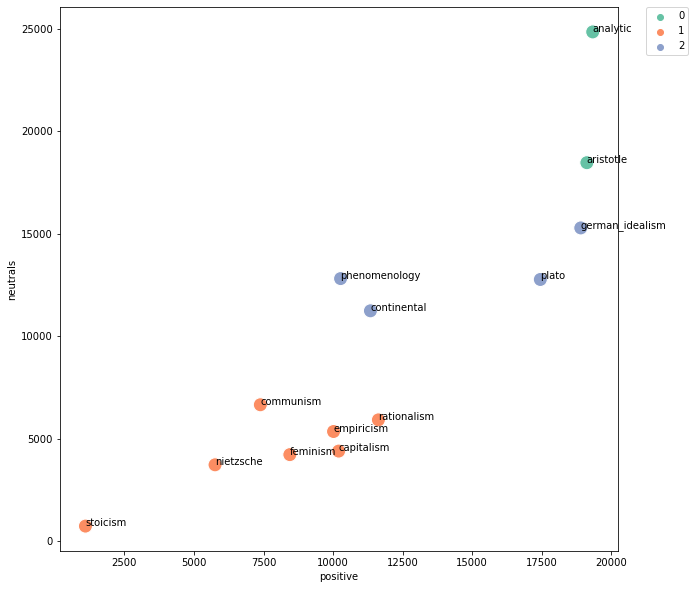

In [416]:
sentiment=pd.DataFrame()
sentiment['school']=schools
sentiment['positive']=positive_list
sentiment['negative']=negative_list
sentiment['neutrals']=neutrals_list
sentiment2=sentiment[['positive','negative','neutrals']]
kmeans=KMeans(n_clusters=3, random_state=0).fit(sentiment2)
sentiment_kmeans=pd.DataFrame()
sentiment_kmeans['school']=schools
sentiment_kmeans['class']=kmeans.labels_

#plot
kmeans_plot=pd.DataFrame()
kmeans_plot['class']=sentiment_kmeans['class']
kmeans_plot['positive']=sentiment['positive']
kmeans_plot['neutrals']=sentiment['neutrals']
kmeans_plot['school']=sentiment['school']
plt.figure(figsize=(10,10))
sns.scatterplot('positive','neutrals',data=kmeans_plot,hue='class',palette="Set2",s=200)
for i in range(len(kmeans_plot)):
    plt.text(kmeans_plot['positive'][i],kmeans_plot['neutrals'][i],kmeans_plot['school'][i])

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

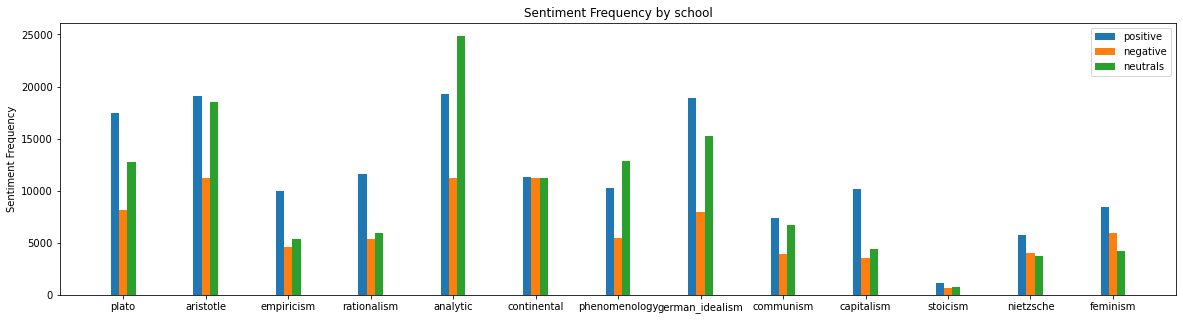

In [25]:
labels=['positive','negative','neutrals']
width=0.1
x = np.arange(13)  # the label locations
plt.figure(figsize=(20,5))
plt.bar(x-width,positive_list,width,label='positive')
plt.bar(x,negative_list,width,label='negative')
plt.bar(x+width,neutrals_list,width,label='neutrals')
plt.ylabel('Sentiment Frequency')
plt.title('Sentiment Frequency by school')
plt.xticks( np.arange(13), schools )

plt.legend()
plt.show()

<BarContainer object of 3 artists>

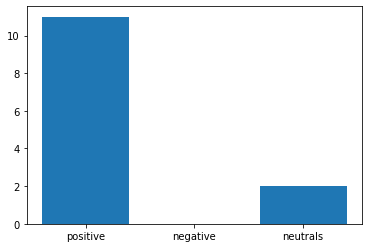

In [417]:
school=df.school.unique()
sentiment_type=['positive','negative','neutrals']
sentiment_num=[11,0,2]
plt.bar(sentiment_type,sentiment_num)

In [418]:
#print(positive_list,negative_list,neutrals_list)

## emotion analysis 

Rather than just positive, sensitive and neutrals, I want to learn their sentiment in more detail. For example, if they talk with much anger, or they are often joyful, or the just feel sad most of time.
Just like sentiment analysis, I also did emotion analysis, which has ten categories: fear, anger, anticip, trust, surprise, positive, negative, sadness, disgust, joy.

In [254]:
#emotion analysis
from nrclex import NRCLex
text=['i love you']
values=NRCLex(text[0]).affect_frequencies.values()
NRCLex(text[0]).affect_frequencies.keys()

dict_keys(['fear', 'anger', 'anticip', 'trust', 'surprise', 'positive', 'negative', 'sadness', 'disgust', 'joy'])

In [317]:
sentiment=['fear', 'anger', 'anticip', 'trust', 'surprise', 'positive', 'negative', 'sadness', 'disgust', 'joy']
df2=pd.DataFrame(columns=sentiment)

for i in range(len(df)):
    sentence=df['sentence_lowered'].iloc[i]
    l=[]
    l.append(sentence)
    values=NRCLex(l[0]).affect_frequencies.values()
    values=list(values)[:10]
    df2.loc[i]=values

From the clustering result, capitalism, empiricism, german_idealism and phenomenology are in the same class, they are very positive.
Feminism, nietzsche and stoicism are in the same class, their sentences contain colorful emotions, they are more angry, surprised, sad, disguisted and joyful compared to other schools. We are more likely moved by the sentences from these schools.


In [421]:
#kmeans
df2['school']=df['school']
df_mean=df2.groupby('school').mean()
print(df_mean)
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=3, random_state=0).fit(df_mean)
df_kmeans=pd.DataFrame()
df_kmeans['school']=df_mean.index
df_kmeans['class']=kmeans.labels_
print(df_kmeans)

                     fear     anger  anticip     trust  surprise  positive  \
school                                                                       
analytic         0.043103  0.029047      0.0  0.151272  0.022902  0.252904   
aristotle        0.060842  0.038101      0.0  0.115776  0.026294  0.240474   
capitalism       0.042250  0.036820      0.0  0.158539  0.025582  0.303872   
communism        0.048392  0.039690      0.0  0.140910  0.026191  0.261876   
continental      0.072273  0.049384      0.0  0.138196  0.024192  0.243392   
empiricism       0.051125  0.040938      0.0  0.147071  0.025679  0.293875   
feminism         0.059774  0.046672      0.0  0.118550  0.030326  0.231054   
german_idealism  0.038809  0.029616      0.0  0.170196  0.023398  0.334093   
nietzsche        0.062330  0.046111      0.0  0.112252  0.033741  0.203881   
phenomenology    0.041838  0.021402      0.0  0.149626  0.022914  0.296749   
plato            0.049912  0.037366      0.0  0.123591  0.026219

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


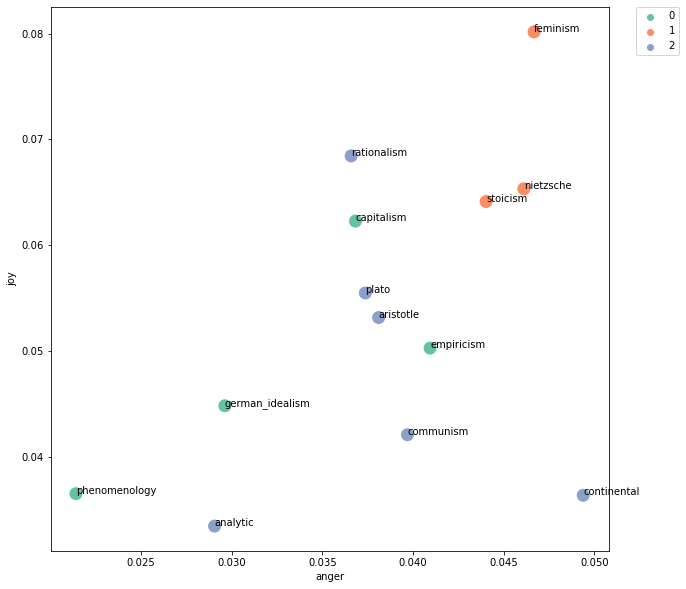

In [420]:
#plot
kmeans_plot2=pd.DataFrame()
kmeans_plot2['class']=df_kmeans['class']
kmeans_plot2['anger']=list(df_mean['anger'])
kmeans_plot2['joy']=list(df_mean['joy'])
kmeans_plot2['school']=df_kmeans['school']
#print(kmeans_plot2)
plt.figure(figsize=(10,10))
sns.scatterplot('anger','joy',data=kmeans_plot2,hue='class',palette="Set2",s=200)
for i in range(len(kmeans_plot2)):
    plt.text(kmeans_plot2['anger'][i],kmeans_plot2['joy'][i],kmeans_plot2['school'][i])

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)